In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## The Ultimate Technologies, Inc. Take-Home Challenge

Ultimate Technologies Inc. is an American worldwide online transportation network company that has disrupted the taxi and logistics industry and is a prestigious companies to work at. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

### Part 1 ‑ Exploratory data analysis

The 'logins.json' file contains (simulated) timestamps of user logins in a particular geographic location. 
1. Aggregate these login counts based on 15minute time intervals, then visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.  
2. Report/illustrate important features of the demand, such as daily cycles.  
3. If there are data quality issues, report them. 


First, I have read in the logins.json file and examined the head and tail of the dataset:

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot defaults
sns.set()                       # sets default plot style
pd.set_option('display.max_columns', 50)
sns.set_context("paper")        # sets default plot context
plt.rc('figure', figsize=(16,8))# sets default figure size
plt.rc('font', size=16)         # controls default text sizes
plt.rc('axes', titlesize=18)    # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc(['xtick', 'ytick'], labelsize=12)   # fontsize of the tick labels
plt.rc('legend', fontsize=16)   # fontsize of the legend labels

# Read in login data from json file to pandas dataframe
logins = pd.read_json('logins.json')
logins.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [3]:
logins.tail(10)

,login_time
93132,1970-04-13 18:36:53
93133,1970-04-13 18:40:31
93134,1970-04-13 18:46:06
93135,1970-04-13 18:40:40
93136,1970-04-13 18:48:52
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [4]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


I then aggregated the login counts in 15 minute intervals, as seen in the table below:

In [5]:
logins_15min = logins.resample('15min', on='login_time').count()
logins_15min.index.names = ['time_interval']
logins_15min.columns = ['num_logins']
logins_15min.head(10)

,num_logins
time_interval,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


We can then plot the login counts over time to see the login patterns over time. 

C:\Users\Caitlin\Miniconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


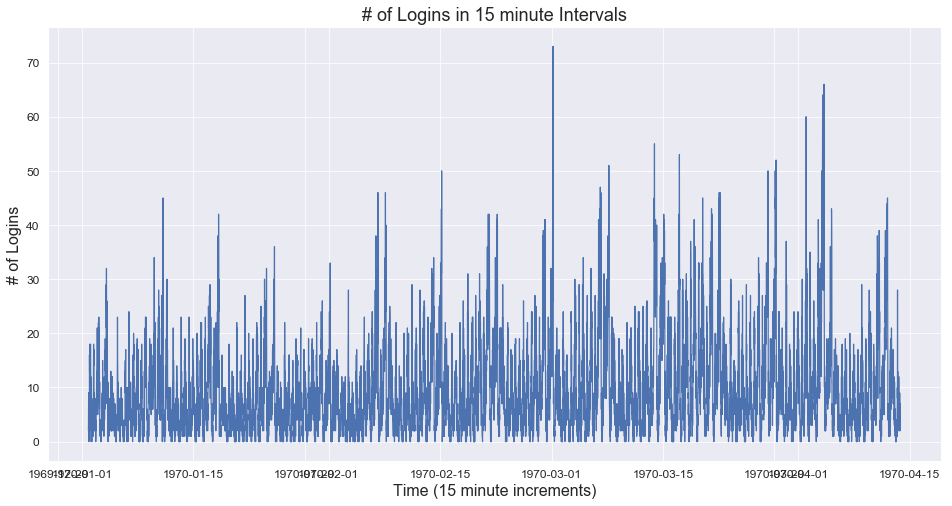

In [6]:
#logins_15min.plot()
plt.figure(figsize=(16, 8))
plt.plot(logins_15min.num_logins)
plt.title('# of Logins in 15 minute Intervals')
plt.xlabel('Time (15 minute increments)')
plt.ylabel('# of Logins')
plt.show()

However, it is difficult to clearly see the underlying patterns in this plot. Therefore, I have resampled the login data by hour and plotted the number of logins per hour over the 4-month time period as well.

                     num_logins
login_time                     
1970-01-01 20:00:00          24
1970-01-01 21:00:00           9
1970-01-01 22:00:00          21
1970-01-01 23:00:00          58
1970-01-02 00:00:00          53


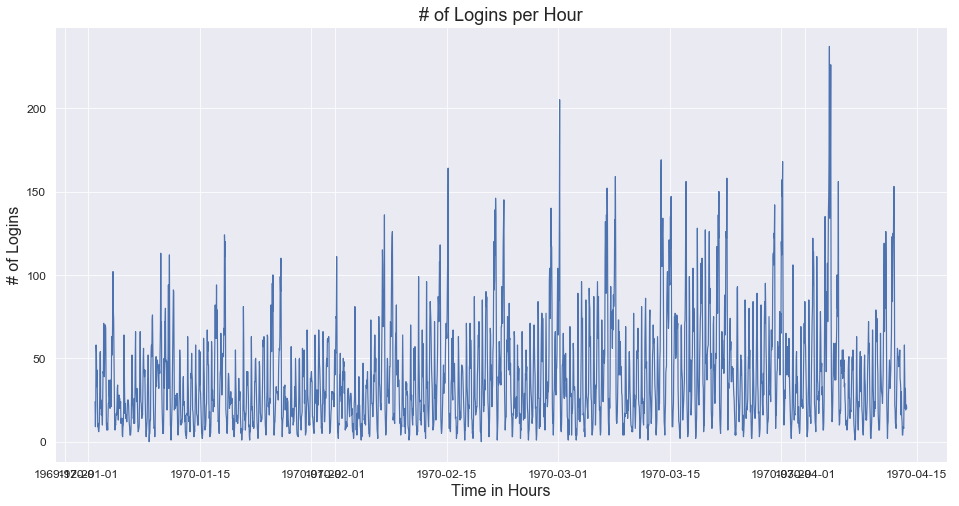

In [7]:
logins_1h = logins.resample('1H', on='login_time').count()
logins_1h.columns = ['num_logins']
print(logins_1h.head())

plt.figure(figsize=(16, 8))
x_labels = pd.date_range(start=logins_1h.index[0], end=logins_1h.index[-1], freq='1W')
sns.lineplot(x=logins_1h.index.values, y='num_logins', data=logins_1h)
plt.title('# of Logins per Hour')
plt.xlabel('Time in Hours')
#plt.xticks(ticks=logins_1h.index, labels=x_labels)
#plt.xticks(pd.date_range(start=logins_1h.index.values[0], end=logins_1h.index.values[-1], freq='1W'))
plt.ylabel('# of Logins')
plt.show()

  login_time  num_logins weekday_name
0 1970-01-01         112     Thursday
1 1970-01-02         681       Friday
2 1970-01-03         793     Saturday
3 1970-01-04         788       Sunday
4 1970-01-05         459       Monday


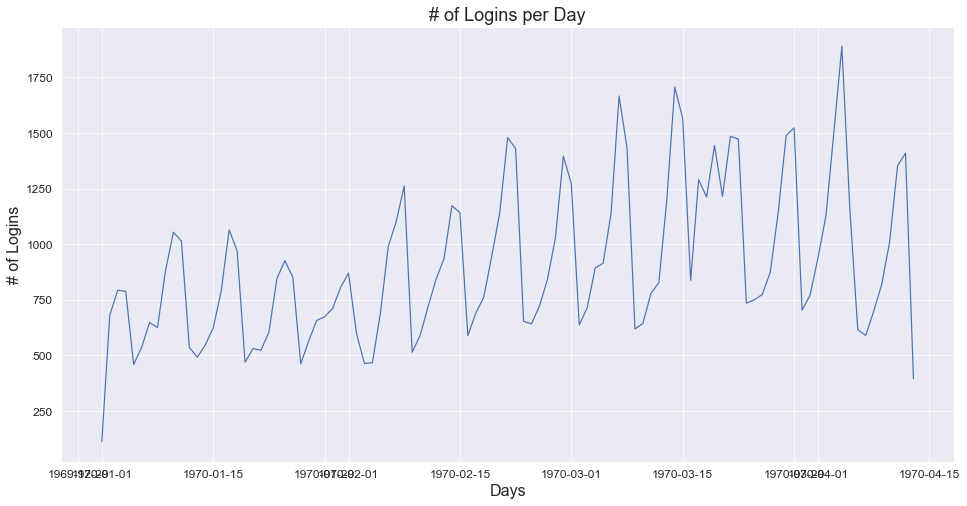

In [8]:
logins_1d = logins.resample('1D', on='login_time').count()
logins_1d.columns = ['num_logins']
logins_1d.reset_index(inplace=True)
logins_1d['weekday_name'] = logins_1d['login_time'].dt.weekday_name
print(logins_1d.head())

plt.figure(figsize=(16, 8))
sns.lineplot(x=logins_1d.login_time, y='num_logins', data=logins_1d)
plt.title('# of Logins per Day')
plt.xlabel('Days')
#plt.xticks(ticks=None, labels=None)
plt.ylabel('# of Logins')
plt.show()

Next, I have aggregated the logins by day of the week to examine the total # of logins per day of the week. As you can see, the number of logins is highest on Satursday and Sunday, drops drastically going into Monday, and then steadily climbs throughout the week until reaching the peak on Saturday.

Sunday       18167
Monday        8823
Tuesday       9268
Wednesday    10339
Thursday     11960
Friday       15208
Saturday     19377
Name: login_time, dtype: int64


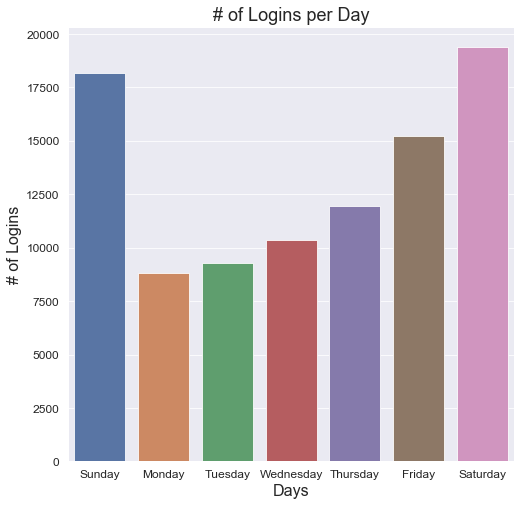

In [9]:
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_logins = logins.login_time.dt.weekday_name.value_counts().reindex(weekdays)
print(weekday_logins)

plt.figure(figsize=(8, 8))
sns.barplot(x=weekdays, y=weekday_logins)
plt.title('# of Logins per Day')
plt.xlabel('Days')
plt.ylabel('# of Logins')
plt.show()

Below are similar plot for # of logins per week and # of logins per month across the time period. The # of logins is lower in January and February, but increases in March and April.

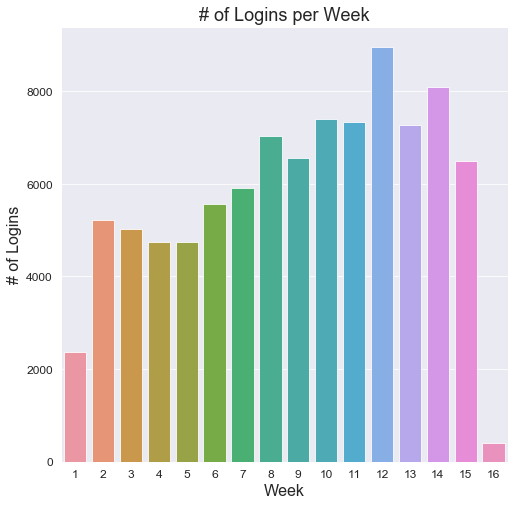

In [10]:
weekly_logins = logins.login_time.dt.weekofyear.value_counts().sort_index()

plt.figure(figsize=(8, 8))
sns.barplot(x=weekly_logins.index, y=weekly_logins)
plt.title('# of Logins per Week')
plt.xlabel('Week')
plt.ylabel('# of Logins')
plt.show()

1    21239
2    24673
3    33723
4    13507
Name: login_time, dtype: int64


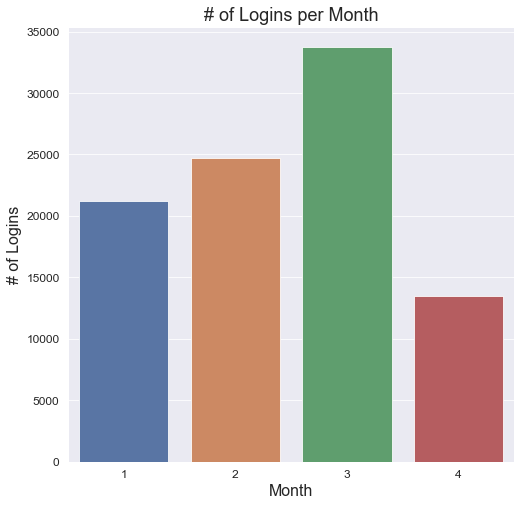

In [11]:
monthly_logins = logins.login_time.dt.month.value_counts().sort_index()
print(monthly_logins)

plt.figure(figsize=(8, 8))
sns.barplot(x=monthly_logins.index, y=monthly_logins)
plt.title('# of Logins per Month')
plt.xlabel('Month')
plt.ylabel('# of Logins')
plt.show()

Finally, I have aggregated the number of logins per hour across the time period to get an idea of the most popular time of day. From this plot, we can see that there is a large peak in login activity from 9 PM to 3 AM and another peak in activity from 11 AM to 1 PM.

0    5993
1    6317
2    5800
3    4831
4    5034
Name: login_time, dtype: int64


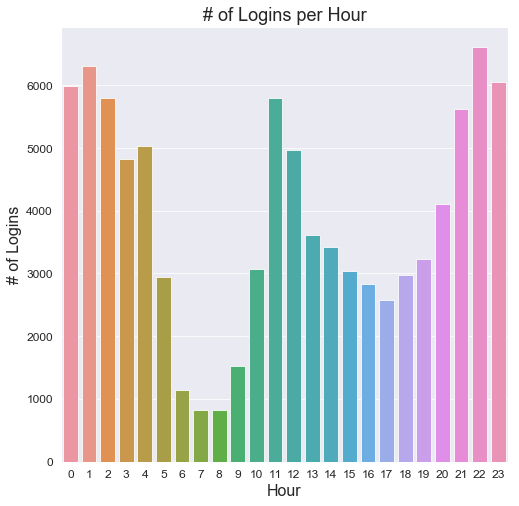

In [12]:
hourly_logins = logins.login_time.dt.hour.value_counts().sort_index()
print(hourly_logins.head())

plt.figure(figsize=(8, 8))
sns.barplot(x=hourly_logins.index, y=hourly_logins)
plt.title('# of Logins per Hour')
plt.xlabel('Hour')
plt.ylabel('# of Logins')
plt.show()

### Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge with a two way toll between the cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    * how you will implement the experiment
    * what statistical test(s) you will conduct to verify the significance of the observation
    * how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    
#### Answers:
1. I would track the number of times drivers crossed from one city to the other as the key measure of success - if the incentive program is successful, the average # of crossings per driver should increase. 

2. First you would need to collect data on the # crossings between cities per driver for several months prior to initiating the toll reimbursement program. Then the same data would need to be collected after implementing the program, again for several months. You could perform a one-tailed t-test to compare the average # of crossings before the program to the # of crossings afterwards to test whether the # of crissings increased. The null hypothesis would be that the average # of crossings prior to implementing the incentive was equal to or higher than the average # of crossings afterwards. If you rejected the null hypothesis, however, that provides evidence that the toll reimbursement program had increased the average # of city crossings per driver. Ultimate Technologies would not just be interested in increasing the number of drivers who  are available in both cities, but also whether having drivers more available would boost revenue. Therefore, I would recommend that they also track the total fares earned per hour - if the reimbursement encourages drivers to cross to the city with higher demands, I would expect their hourly earnings to increase, as either the # of trips or the fare per trip increased. If the program resulted in increased revenue that paid for the toll reimbursements while also increasing revenue, I would recommend switching to the toll reimbursemnt program.

### Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate. 

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

In [13]:
# Read in user data from json as a pandas dataframe: ut_data
with open('ultimate_data_challenge.json', 'r') as json_file:
    users = pd.DataFrame(json.load(json_file))

# Explore content and structure of user data
print(users.shape)
users.columns

(50000, 12)


Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [15]:
users.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [16]:
users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


Right away we can see that there are a number of null values in the avg_rating_by_driver, avg_rating_of_driver, and phone columns, so let's deal with those first.

In [17]:
print('Number of null values per feature:')
print(users.isnull().sum())

Number of null values per feature:
avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64


In [18]:
null_rating_by_driver = users[users.avg_rating_by_driver.isnull()]
null_rating_by_driver

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
90,6.28,NaN,5.0,1.00,Winterfell,2014-02-09,iPhone,2014-01-10,0.0,1,False,0.0
274,6.00,NaN,2.0,4.00,Astapor,2014-02-09,iPhone,2014-01-25,100.0,1,False,0.0
277,1.82,NaN,NaN,1.00,Winterfell,2014-01-26,iPhone,2014-01-25,0.0,1,False,0.0
536,1.41,NaN,5.0,1.00,Winterfell,2014-02-08,Android,2014-01-18,0.0,1,False,100.0
857,0.42,NaN,4.0,1.00,Winterfell,2014-03-16,iPhone,2014-01-11,0.0,0,False,0.0
1021,2.33,NaN,NaN,1.75,King's Landing,2014-06-13,iPhone,2014-01-23,100.0,0,True,100.0
1073,9.21,NaN,5.0,1.00,King's Landing,2014-04-27,Android,2014-01-19,0.0,0,False,0.0
1164,2.57,NaN,2.0,1.00,Winterfell,2014-01-25,Android,2014-01-24,0.0,1,True,100.0
1181,24.91,NaN,3.0,1.00,Winterfell,2014-01-25,Android,2014-01-25,0.0,1,False,0.0
1205,8.94,NaN,NaN,1.00,Winterfell,2014-02-22,Android,2014-01-18,0.0,0,False,100.0


In [19]:
null_rating_by_driver.isnull().sum()

avg_dist                    0
avg_rating_by_driver      201
avg_rating_of_driver       67
avg_surge                   0
city                        0
last_trip_date              0
phone                       3
signup_date                 0
surge_pct                   0
trips_in_first_30_days      0
ultimate_black_user         0
weekday_pct                 0
dtype: int64

In [20]:
null_rating_of_driver = users[users.avg_rating_of_driver.isnull()]
null_rating_of_driver.head(25)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0
12,20.29,5.0,NaN,1.00,Winterfell,2014-03-12,iPhone,2014-01-15,0.0,1,False,100.0
14,26.01,5.0,NaN,1.00,Astapor,2014-01-28,Android,2014-01-27,0.0,1,False,100.0
15,13.20,5.0,NaN,1.00,Winterfell,2014-01-16,Android,2014-01-15,0.0,1,True,100.0
20,2.53,3.0,NaN,1.00,Winterfell,2014-03-16,Android,2014-01-31,0.0,1,False,50.0
21,3.31,5.0,NaN,1.00,Astapor,2014-04-29,iPhone,2014-01-09,0.0,1,False,100.0
22,11.47,5.0,NaN,1.00,Winterfell,2014-05-02,iPhone,2014-01-24,0.0,0,False,100.0
25,14.48,5.0,NaN,1.00,Winterfell,2014-01-03,iPhone,2014-01-02,0.0,1,True,100.0
28,5.97,5.0,NaN,1.50,Winterfell,2014-06-08,iPhone,2014-01-19,100.0,0,False,0.0


In [21]:
null_rating_of_driver.isnull().sum()

avg_dist                     0
avg_rating_by_driver        67
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                       96
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [22]:
null_phone = users[users.phone.isnull()]
null_phone

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
134,2.88,5.0,5.0,1.00,King's Landing,2014-06-11,None,2014-01-10,0.0,0,False,100.0
176,20.32,5.0,5.0,1.00,Astapor,2014-03-18,None,2014-01-28,0.0,0,False,100.0
320,31.01,5.0,5.0,1.00,Astapor,2014-01-09,None,2014-01-08,0.0,1,False,100.0
349,6.03,5.0,3.3,1.00,Winterfell,2014-06-22,None,2014-01-06,0.0,1,True,33.3
389,3.08,4.8,4.9,1.02,King's Landing,2014-07-01,None,2014-01-26,3.0,5,False,66.7
434,5.09,4.4,4.8,1.13,King's Landing,2014-06-25,None,2014-01-23,14.3,3,False,85.7
494,2.59,4.9,5.0,1.03,Astapor,2014-06-10,None,2014-01-24,10.5,1,False,94.7
532,7.21,4.5,5.0,1.06,King's Landing,2014-06-27,None,2014-01-11,7.7,0,True,51.3
534,129.89,5.0,NaN,1.00,King's Landing,2014-03-09,None,2014-01-04,0.0,0,False,0.0
611,3.01,3.5,5.0,1.04,Astapor,2014-03-01,None,2014-01-17,16.7,5,False,83.3


In [23]:
null_phone.isnull().sum()

avg_dist                    0
avg_rating_by_driver        3
avg_rating_of_driver       96
avg_surge                   0
city                        0
last_trip_date              0
phone                     396
signup_date                 0
surge_pct                   0
trips_in_first_30_days      0
ultimate_black_user         0
weekday_pct                 0
dtype: int64

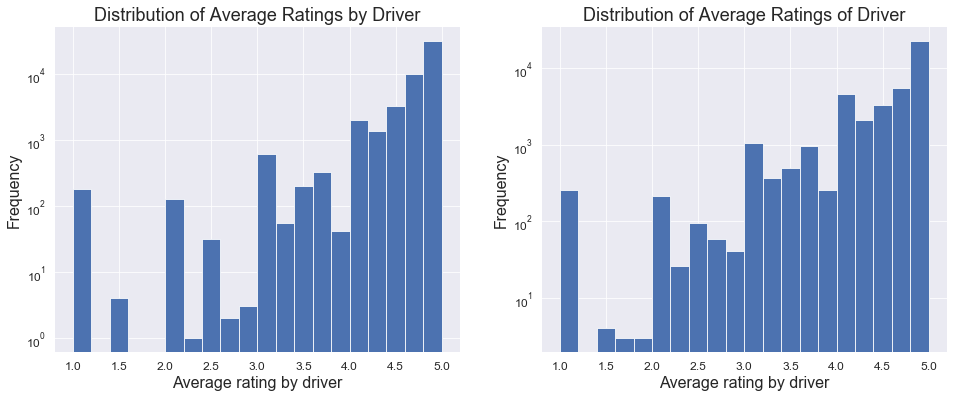

In [24]:
# Plot distribution of average_ratings_by_drive and average_ratings_of_driver

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
users.avg_rating_by_driver.plot(kind='hist', bins=20, logy=True)
plt.title("Distribution of Average Ratings by Driver")
plt.xlabel("Average rating by driver")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
users.avg_rating_of_driver.plot(kind='hist', bins=20, logy=True)
plt.title("Distribution of Average Ratings of Driver")
plt.xlabel("Average rating by driver")
plt.ylabel("Frequency")
plt.show()

plt.show()

The distribution of average ratings are skewed towards the 4.0 - 5.0 range. As there are over 8000 observations with missing values for the average rating of driver, it would be preferable to keep them in the dataset rather than simply deleting the rows with null values. The best way to do this for the average rating of driver and the average rating by driver would be to replace the null values with the mean for that feature. This method retains the valuable information for the non-null features without skewing the average ratings distributions.

In [25]:
mean_rating_by_driver = users.avg_rating_by_driver.mean()
mean_rating_of_driver = users.avg_rating_of_driver.mean()
users['avg_rating_by_driver'] = users['avg_rating_by_driver'].fillna(mean_rating_by_driver)
users['avg_rating_of_driver'] = users['avg_rating_of_driver'].fillna(mean_rating_of_driver)

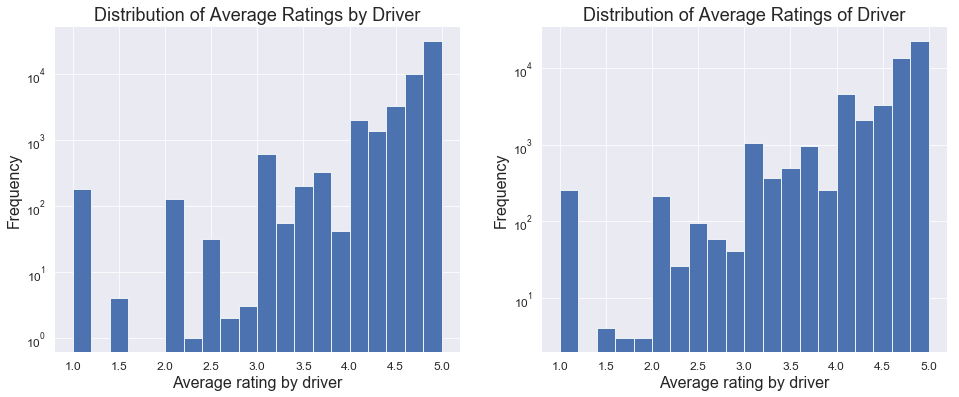

In [26]:
# Plot distribution of average_ratings_by_drive and average_ratings_of_driver

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
users.avg_rating_by_driver.plot(kind='hist', bins=20, logy=True)
plt.title("Distribution of Average Ratings by Driver")
plt.xlabel("Average rating by driver")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
users.avg_rating_of_driver.plot(kind='hist', bins=20, logy=True)
plt.title("Distribution of Average Ratings of Driver")
plt.xlabel("Average rating by driver")
plt.ylabel("Frequency")
plt.show()

plt.show()

For the null values in phone column, we can simply replace the null values with a string such as 'Other' or 'Not given' to indicate that the user doesn't have either an iPhone or an Android phone. As you can see, only 0.80% of users do not have a phone type specified.

In [27]:
users.phone.fillna('Other', inplace=True)
user_phones = users.phone.value_counts()
android_users = user_phones['Android'] / users.phone.count()
iphone_users = user_phones['iPhone'] / users.phone.count()
other_users = user_phones['Other'] / users.phone.count()
print('{}% of users have Android phones.'.format(round(android_users * 100, 2)))
print('{}% of users have iPhones.'.format(round(iphone_users * 100, 2)))

30.04% of users have Android phones.
69.16% of users have iPhones.


In [28]:
signup_city = pd.DataFrame(users.city.value_counts())
signup_city.columns = ['num_users']
signup_city.info()
signup_city['percent_users'] = round((signup_city.num_users / signup_city.num_users.sum()) * 100, 2)
signup_city

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Winterfell to King's Landing
Data columns (total 1 columns):
num_users    3 non-null int64
dtypes: int64(1)
memory usage: 48.0+ bytes


,num_users,percent_users
Winterfell,23336,46.67
Astapor,16534,33.07
King's Landing,10130,20.26


The next step needed to prepare the data for training predictive models is to convert the data type for the dates (signup_date and last_trip_date) from 'object' to 'datetime'. We can then easily determine the fraction of active users by filtering out users with a last_trip_date in June and comparing it to the total number of users in the dataset.

In [29]:
users.last_trip_date = pd.to_datetime(users.last_trip_date)
users.signup_date = pd.to_datetime(users.signup_date)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [30]:
users['last_trip_date'].describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [31]:
users['retained'] = (users.last_trip_date >= '2014-06-01')*1.0
users.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.000000,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.300000,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.400000,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,1.0
6,3.95,4.0,4.601559,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,0.0
7,2.04,5.0,5.000000,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,0.0
8,4.36,5.0,4.500000,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,0.0
9,2.37,5.0,4.601559,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,0.0


In [32]:
percent_retained = (users.retained.sum() / users.retained.count()) * 100
print("Percentage of users retained after 6 months: {}%".format(round(percent_retained, 2)))

Percentage of users retained after 6 months: 37.61%


Next the categorical columns were dummy encoded into binary featues. We can also calculate the number of days since a user's last trip and look at the distribution. 

In [33]:
users_ml = pd.get_dummies(users, columns=['city', 'phone'], dtype=float)
users_ml['days_since_last_trip'] = (users['last_trip_date'] - users['signup_date']).astype('timedelta64[D]')
users_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null float64
city_Astapor              50000 non-null float64
city_King's Landing       50000 non-null float64
city_Winterfell           50000 non-null float64
phone_Android             50000 non-null float64
phone_Other               50000 non-null float64
phone_iPhone              50000 non-null float64
days_since_last_trip      50000 non-null float64


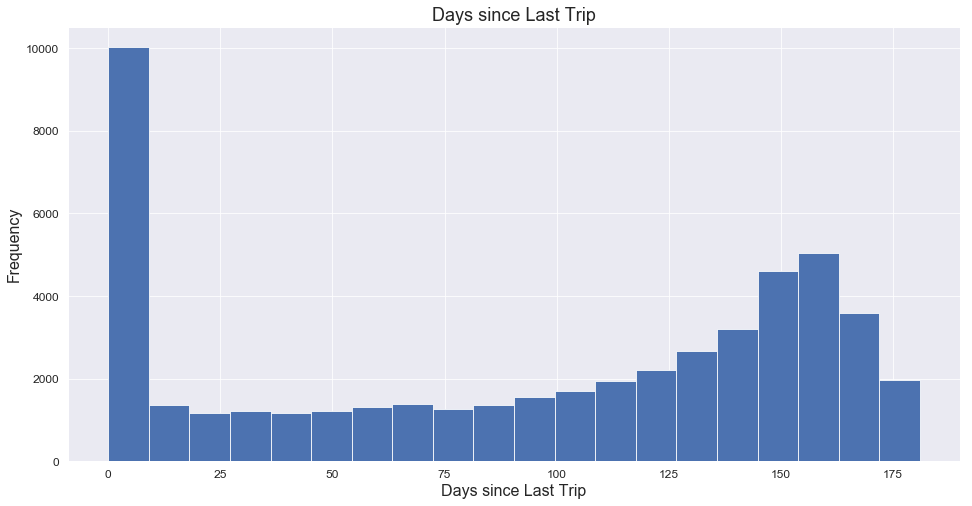

In [34]:
plt.figure(figsize=(16,8))
users_ml.days_since_last_trip.plot(kind='hist', bins=20)
plt.title("Days since Last Trip")
plt.xlabel("Days since Last Trip")
plt.ylabel("Frequency")
plt.show()

Before training a model using the dataset, we also need to drop the 'last_trip_date' column, as this was used to calculate the target variable. The signup date is also not useful for training a model, as this dataset was specifically selected to only contain the January cohort of new users. One of the city columns and the 'phone_Other' column are redundant and can also be removed. The final step is to convert the datatype of all features to float.

In [35]:
users_ml.drop(['signup_date', 'last_trip_date', 'days_since_last_trip', 
               "phone_Other", "city_King\'s Landing"], axis=1, inplace=True)
users_ml = users_ml.astype(dtype=float)
users_ml.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,city_Astapor,city_Winterfell,phone_Android,phone_iPhone
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,0.37708,60.926084,0.376080,0.330680,0.466720,0.300440,0.691640
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,0.48466,37.081503,0.484405,0.470463,0.498896,0.458454,0.461821
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.00000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,0.00000,66.700000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


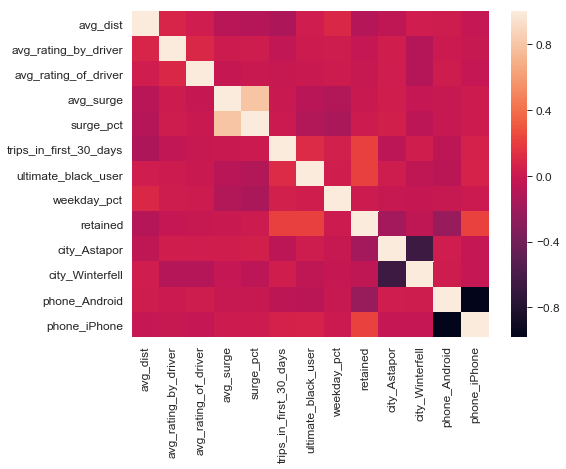

In [36]:
corr_matrix = users_ml.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix)
plt.show()

In [37]:
corr_matrix['retained'].sort_values(ascending=False)

retained                  1.000000
phone_iPhone              0.225244
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.010829
avg_rating_by_driver     -0.026748
city_Winterfell          -0.046611
avg_dist                 -0.092780
city_Astapor             -0.174655
phone_Android            -0.225464
Name: retained, dtype: float64

Now we can used the clean dataset for feature selection and then train machine learning models.

Feature Ranking:
1. avg_dist (0.279112)
2. weekday_pct (0.154958)
3. trips_in_first_30_days (0.098828)
4. avg_rating_by_driver (0.097943)
5. avg_rating_of_driver (0.089302)
6. surge_pct (0.070187)
7. avg_surge (0.054910)
8. city_Astapor (0.039712)
9. ultimate_black_user (0.035863)
10. city_Winterfell (0.032549)
11. phone_Android (0.024965)
12. phone_iPhone (0.021671)


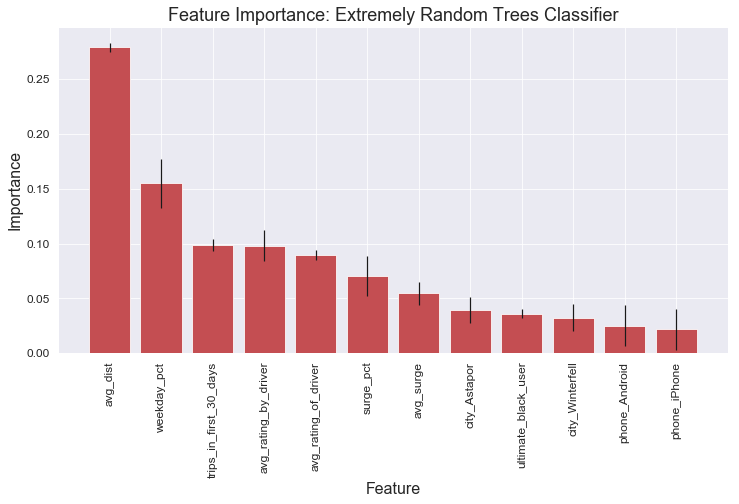

In [38]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

X = users_ml.drop(['retained'], axis=1)
y = users_ml.retained

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1582, stratify=y)

# Build an extremely randomized forest and compute the feature importances
forest_pipeline = Pipeline(steps=[('scaler', StandardScaler()), 
                                  ('forest', ExtraTreesClassifier(n_estimators=500, random_state=88))])
forest_pipeline.fit(X_train, y_train)
features = np.array(X_train.columns)
importances = forest_pipeline.named_steps.forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_pipeline.named_steps.forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature Ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,6))
plt.title('Feature Importance: Extremely Random Trees Classifier')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()

Feature Ranking:
1. avg_rating_by_driver (0.239733)
2. surge_pct (0.174352)
3. weekday_pct (0.159975)
4. city_Astapor (0.106718)
5. ultimate_black_user (0.062087)
6. city_Winterfell (0.061510)
7. trips_in_first_30_days (0.053559)
8. phone_Android (0.053184)
9. avg_dist (0.033298)
10. phone_iPhone (0.025744)
11. avg_surge (0.016227)
12. avg_rating_of_driver (0.013613)


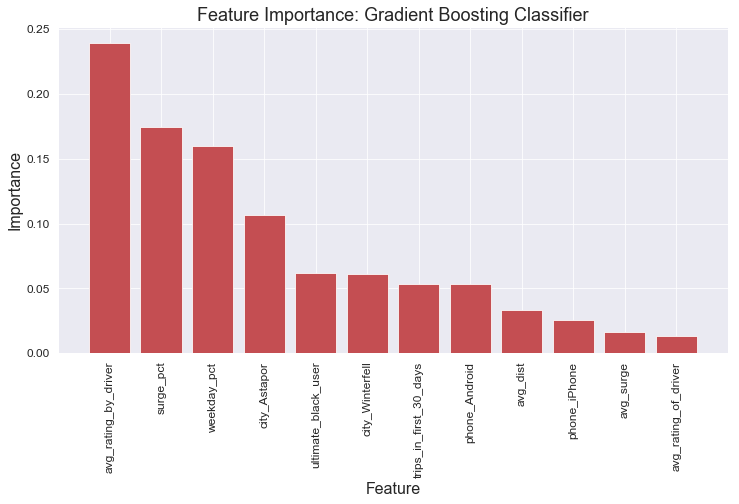

In [39]:
# Fit GradientBoostingClassifier and compute feature importances
gbc = GradientBoostingClassifier(n_estimators=500)
gbc.fit(X_train, y_train)
features = X_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature Ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

# Plot the feature importances from the gbc
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[indices], color="r", align="center")
plt.xticks(range(len(importances)), features[indices], rotation='vertical')
plt.xlim([-1, len(importances)])
plt.title('Feature Importance: Gradient Boosting Classifier')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:   20.0s finished


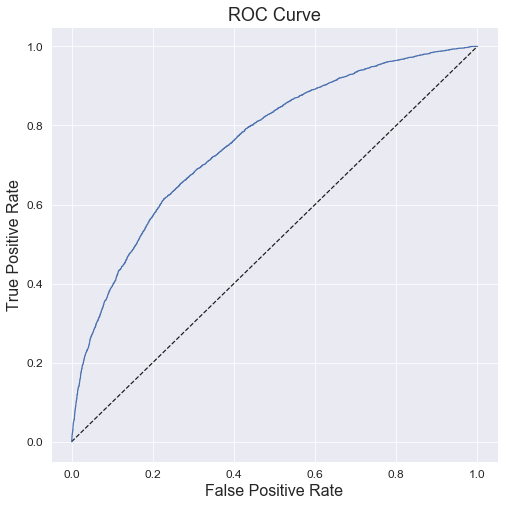

AUC is 0.76
Best C is 0.1
Best solver is lbfgs
Accuracy: 71.31%

Confusion matrix: 
[[6671 1128]
 [2458 2243]]

Classification report: 
              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79      7799
         1.0       0.67      0.48      0.56      4701

   micro avg       0.71      0.71      0.71     12500
   macro avg       0.70      0.67      0.67     12500
weighted avg       0.71      0.71      0.70     12500



In [40]:
# Logistic Regression classifier
# Initiate logistic regression pipeline
logreg_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

# Set parameters to test
parameters = {'logreg__C': np.logspace(-5, 5, 11), 'logreg__solver': ['lbfgs', 'sag']}

# Perform GridSearch on list of parameters, then fit the model
logreg_cv = GridSearchCV(logreg_pipeline, param_grid=parameters, cv=5, iid=False, verbose=1)
logreg_cv.fit(X_train, y_train)
logreg_y_pred = logreg_cv.predict(X_test)

# Compute predicted probabilities of test set labels
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

# Plot ROC curve
plt.rc('figure', figsize=(8,8)) # sets default figure size
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('AUC is {}'.format(round(roc_auc_score(y_test, y_pred_prob), 2)))

# Print classification metrics
print('Best C is {}'.format(logreg_cv.best_params_['logreg__C']))
print('Best solver is {}'.format(logreg_cv.best_params_['logreg__solver']))
print('Accuracy: {:.2%}\n'.format(logreg_cv.score(X_test, y_test)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(y_test, logreg_y_pred)))
print('Classification report: \n{}'.format(classification_report(y_test, logreg_y_pred)))


In [41]:
features = X_train.columns
coef = logreg_cv.best_estimator_.named_steps.logreg.coef_[0]
df = pd.DataFrame(data={'features': features, 'coef': coef})
df.sort_values(by='coef', inplace=True)
# Print the feature ranking
print(df)

                  features      coef
8             city_Astapor -0.814680
9          city_Winterfell -0.623638
10           phone_Android -0.214270
0                 avg_dist -0.210758
1     avg_rating_by_driver -0.071520
3                avg_surge -0.030901
2     avg_rating_of_driver -0.030116
7              weekday_pct -0.002483
4                surge_pct  0.073735
11            phone_iPhone  0.269156
6      ultimate_black_user  0.415739
5   trips_in_first_30_days  0.472337


In [42]:
# Linear Support Vector Classifier (LinearSVC)
# Initiate scaler and classifier pipeline 
linsvc_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('linsvc', LinearSVC(dual=False, max_iter=1000))])

# Set parameters to test
parameters = {'linsvc__C': np.logspace(-5, 5, 11)}

# Perform GridSearch on list of parameters, then fit the model
linsvc_cv = GridSearchCV(linsvc_pipeline, param_grid=parameters, cv=5, iid=False, verbose=1)
linsvc_cv.fit(X_train, y_train)
linsvc_y_pred = linsvc_cv.predict(X_test)

# Print out classification metrics
print('Best C is {}'.format(linsvc_cv.best_params_['linsvc__C']))
print('Accuracy: {:.2%}\n'.format(linsvc_cv.score(X_test, y_test)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(y_test, linsvc_y_pred)))
print('Classification report: \n{}'.format(classification_report(y_test, linsvc_y_pred)))

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best C is 0.001
Accuracy: 71.18%

Confusion matrix: 
[[6729 1070]
 [2532 2169]]

Classification report: 
              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79      7799
         1.0       0.67      0.46      0.55      4701

   micro avg       0.71      0.71      0.71     12500
   macro avg       0.70      0.66      0.67     12500
weighted avg       0.71      0.71      0.70     12500



[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    7.2s finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.3min finished


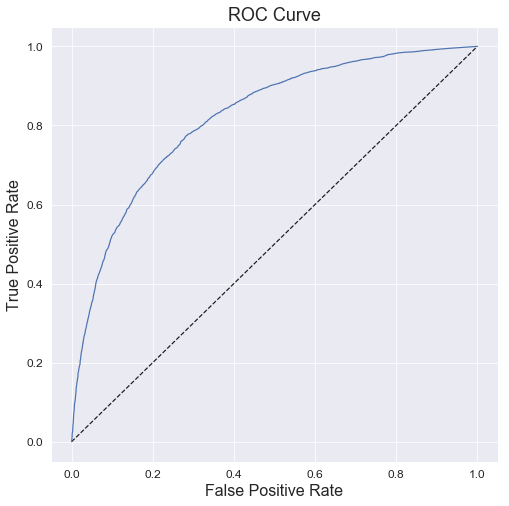

AUC is 0.82
Best n_estimators is: 500

Best max_features is: 2

Accuracy: 75.65%

Confusion matrix: 
[[6341 1458]
 [1586 3115]]

Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81      7799
         1.0       0.68      0.66      0.67      4701

   micro avg       0.76      0.76      0.76     12500
   macro avg       0.74      0.74      0.74     12500
weighted avg       0.76      0.76      0.76     12500



In [44]:
# Random Forest Classifier
# Initiate RandomForest pipeline
rfc_pipeline = Pipeline(steps=[('scaler', StandardScaler()),('rfc', RandomForestClassifier(random_state=42))])

# Set parameters to test
parameters = {'rfc__n_estimators': [500], 
              'rfc__max_features': np.arange(2, 4, 1)}

# Perform GridSearch on list of parameters, then fit the model
rfc_cv = GridSearchCV(rfc_pipeline, param_grid=parameters, cv=5, iid=False, return_train_score=False, verbose=1)
rfc_cv.fit(X_train, y_train)
rfc_y_pred = rfc_cv.predict(X_test)

# Compute predicted probabilities of test set labels
y_pred_prob = rfc_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('AUC is {}'.format(round(roc_auc_score(y_test, y_pred_prob), 2)))

# Print out classification metrics
print('Best n_estimators is: {}\n'.format(rfc_cv.best_params_['rfc__n_estimators']))
print('Best max_features is: {}\n'.format(rfc_cv.best_params_['rfc__max_features']))
print('Accuracy: {:.2%}\n'.format(rfc_cv.score(X_test, y_test)))
print('Confusion matrix: \n{}\n'.format(confusion_matrix(y_test, rfc_y_pred)))
print('Classification report: \n{}'.format(classification_report(y_test, rfc_y_pred)))

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

I tested a logistic regression model, a linear support vector machine, and a random forest. The random forest performed the best by several metrics, including the AUC (0.82), accuracy (75.65%), precision (0.68), and recall (0.66).
 
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

The features with the most influence on driver retention were the average rating by driver, the surge percentage, the average distance, and the percentage of a user's trip that occur on the weekends. The average distance is probaly not very actionable, unless users are offered strong incentives to use the app to go father. The most useful features are the surge percentage and the average rating by driver. The surge percentage is directly controlled by Ultimate, and they could decrease surge percentages to increase user retention, or retrict surge percentages so that they don't apply for new users' first month or so. They could also encourage their drivers to give high ratings to passengers unless they were very rude or problematic.